<a href="https://colab.research.google.com/github/chavamoon/data_visualization/blob/main/Visualizaci%C3%B3n_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualización de datos


## Importancia

En un mundo mundo cada vez más impulsado por data-driven es más importante que nunca tener formas accesibles ver y comprender los datos.

Una correcta visualización ayuda a las personas a ver, interactuar y comprender mejor los datos. Ya sea simple o complejo, la visualización correcta puede traer a todos a la misma página, independientemente de su nivel de experiencia.

En una era de Big Data, la visualización es una herramienta cada vez más importante para dar sentido a los billones de registros que se generan todos los días. La visualización de datos ayuda a contar historias al seleccionar los datos en una forma más fácil de entender, destacando las tendencias y los valores atípicos. Una buena visualización cuenta una historia, eliminando el ruido de los datos y destacando información útil.

![Data Visualization](https://neilpatel.com/wp-content/uploads/2021/03/Data-Visualization_Featured-Image-1.png)

## Librerías de graficación y visualización de datos en Python

* **MatplotLib**: 
Es una biblioteca para crear visualizacioens estáticas, interactivas y animadas.
Muchas otras librerías de graficación se contruyen sobre Matplotlib.

  - matplotlib.pyplot es una parte de matplotlib con funciones muy similares a MatLab con una interface muy sencilla de usar.

 https://matplotlib.org/ 

 
 * **Seaborn**:
Seaborn es una biblioteca de visualización de Python basada en matplotlib. La biblioteca proporciona una interfaz de alto nivel gráficos estadísticos. Como la biblioteca usa matplotlib en el backend, podemos usar las funciones en matplotlib junto con las funciones en seaborn. Varias funciones en la biblioteca de seaborn nos permiten trazar gráficos estadísticos complejos y avanzados

 https://seaborn.pydata.org/ 


In [ ]:
!pip install matplotlib
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## Gráfica de línea (Line Plot)

Un gráfico de línea muestra la relación entre dos variables de un conjunto de datos.


In [ ]:
dataset = sns.load_dataset("fmri")
dataset.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


Plot permite realizar gráficas de línea especificando los valores de 'x' e 'y'
del conjunto de datos. Es posible graficar más de una gráfica de línea en un
solo conjunto de datos.

- Formas de llamar plot:
  - plot([x], y, [fmt], *, data=None, **kwargs)
  - plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs) 
  - Donde:
      - x, y: Datos x e y
      - fmt: formato de cada inersección

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

<Figure size 432x288 with 0 Axes>

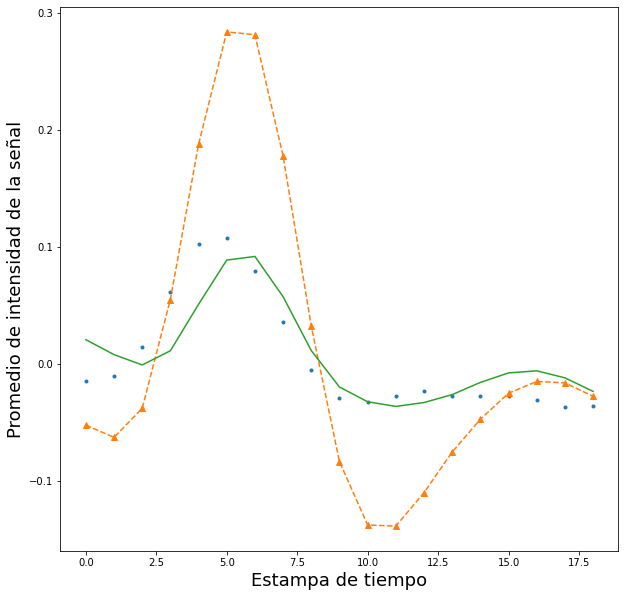

In [ ]:
grouped_by_subject = dataset.groupby('subject')
g0 = grouped_by_subject.get_group((list(grouped_by_subject.groups)[0])).groupby('timepoint').mean().reset_index()
g1 = grouped_by_subject.get_group((list(grouped_by_subject.groups)[1])).groupby('timepoint').mean().reset_index()
g2 = grouped_by_subject.get_group((list(grouped_by_subject.groups)[2])).groupby('timepoint').mean().reset_index()

#clf limpia nuestra figua atual donde se graficará
plt.clf()
# Cambiar el tamaño de la gráfica
plt.figure(figsize=(10,10)) 
# Nombre del eje de las x
plt.xlabel('Estampa de tiempo', fontsize=18)
# Nombre del eje de las y
plt.ylabel('Promedio de intensidad de la señal', fontsize=18)

plt.plot(g0['timepoint'], g0['signal'],'.',
         g1['timepoint'], g1['signal'],'^--',
         g2['timepoint'], g2['signal'])
#plt show muestra el contenido de la figura actual
plt.show()


## Gráfica de dispersión

Una gráfica de dispersión es un conjunto de puntos trazados en ejes horizontales y verticales. El diagrama de dispersión se puede utilizar para estudiar la correlación entre las dos variables. También se pueden detectar datos atípicos mediante un diagrama de dispersión.


* scatter es una función que permite realizar gráficas de dispersión.
    - Parámetros:

      - x, y -> Valores de x e y
      - s -> Tamaño de los marcadores (puntos)
      - c -> Colores de los marcadores
      - marker -> Estilo del marcador

    https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

<Figure size 432x288 with 0 Axes>

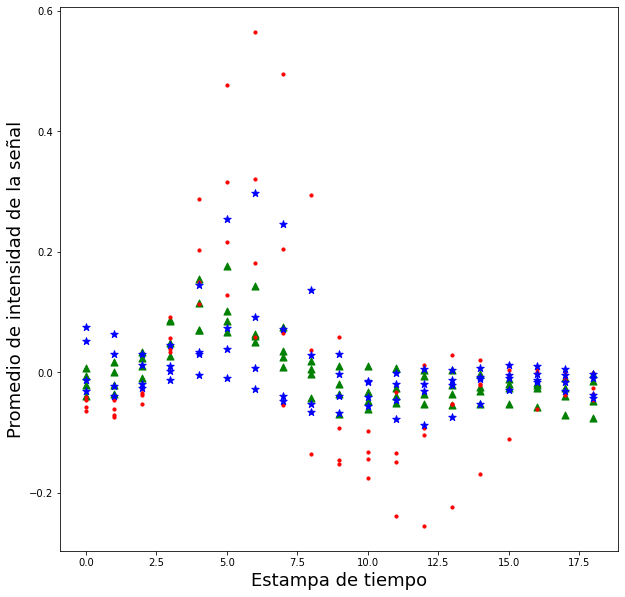

In [ ]:
g0 = grouped_by_subject.get_group((list(grouped_by_subject.groups)[0]))
g1 = grouped_by_subject.get_group((list(grouped_by_subject.groups)[1]))
g2 = grouped_by_subject.get_group((list(grouped_by_subject.groups)[2]))


#clf limpia nuestra figua atual donde se graficará
plt.clf()
# Cambiar el tamaño de la gráfica
plt.figure(figsize=(10,10)) 
# Nombre del eje de las x
plt.xlabel('Estampa de tiempo', fontsize=18)
# Nombre del eje de las y
plt.ylabel('Promedio de intensidad de la señal', fontsize=18)

#Es posible crear más de una gráfica en la misma figura
plt.scatter(g0['timepoint'], g0['signal'], s=50, c='green', marker = '^' )
plt.scatter(g1['timepoint'], g1['signal'], s=40, c='red', marker = '.' )
plt.scatter(g2['timepoint'], g2['signal'], s=60, c ='blue', marker = '*')
#plt show muestra el contenido de la figura actual
plt.show()

## Gráfica de barras

Una gráfica de barras se usa para mostrar datos categóricos con barras con longitudes proporcionales a los valores que representan.

La comparación entre diferentes categorías de una variable categórica se puede realizar estudiando un gráfico de barras.

En el gráfico de barras verticales, el eje X muestra la variable categórica y el eje Y contiene los valores correspondientes a las diferentes categorías.

* bar permite realizar las gráficas de barras:
    * x - Nombre de cada barra
    * height - Altura de cada barra
    * width - Ancho de cada barra - default = 0.8
    * color - Color(es) de cada barra

<Figure size 432x288 with 0 Axes>

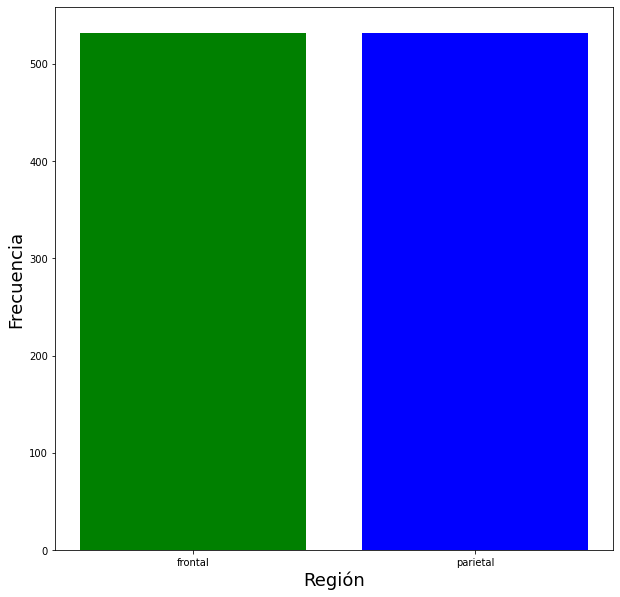

In [ ]:
region_count = dataset.groupby('region').count()[['event']].rename(columns ={'event': 'frequency'}).reset_index()

#clf limpia nuestra figua atual donde se graficará
plt.clf()
# Cambiar el tamaño de la gráfica
plt.figure(figsize=(10,10)) 
# Nombre del eje de las x
plt.xlabel('Región', fontsize=18)
# Nombre del eje de las y
plt.ylabel('Frecuencia', fontsize=18)

#Gráfica de barras
plt.bar(region_count['region'], region_count['frequency'], color=['green','blue'])
#plt show muestra el contenido de la figura actual
plt.show()

## Histograma

Se utiliza el histograma para mostrar la distribución y dispersión de una variable continua. Un eje representa el rango de la variable y el otro eje muestra la frecuencia de los puntos de datos. En un histograma, no hay espacios entre las barras.

- hist es la funcion que permite graficar histogramas:
  - x - Variable continua
  - bins - ¿En cuantas partes de mismo tamaño dividiremos la variable continua?
     


<Figure size 432x288 with 0 Axes>

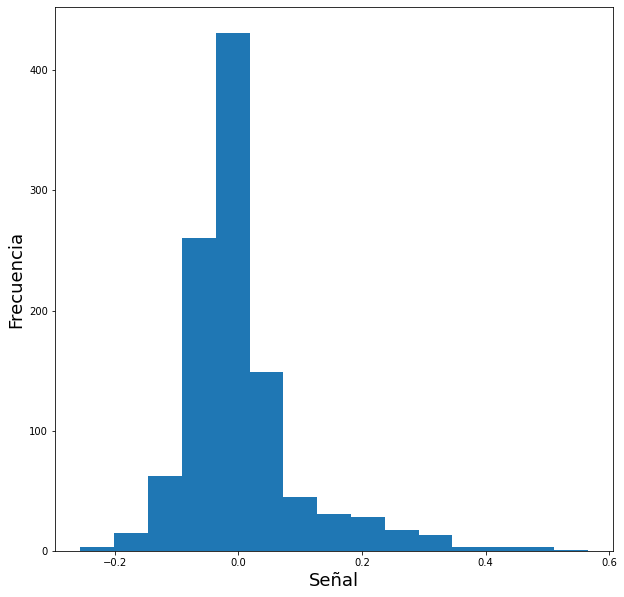

In [ ]:
#clf limpia nuestra figua atual donde se graficará
plt.clf()
# Cambiar el tamaño de la gráfica
plt.figure(figsize=(10,10)) 
# Nombre del eje de las x
plt.xlabel('Señal', fontsize=18)
# Nombre del eje de las y
plt.ylabel('Frecuencia', fontsize=18)

#Histograma
plt.hist(dataset['signal'],bins = 15)
#plt show muestra el contenido de la figura actual
plt.show()

## Boxplot

La gráfica de boxplot es una forma de visualizar el 'resumen de cinco números' de una variable. El resumen de cinco números incluye las cantidades numéricas:
*  mínimo
*  primer cuartil o percentil 25 (Q1)
*  mediana (Q2)
*  tercer cuartil (Q3)
*  máximo. 

Con esta gráfica es posible identifciar los valores atípicos en los datos. La detección y eliminación de valores atípicos es uno de los pasos más importantes en el análisis exploratorio de datos. 
Los boxplot también informan sobre la distribución de los datos.

<Figure size 432x288 with 0 Axes>

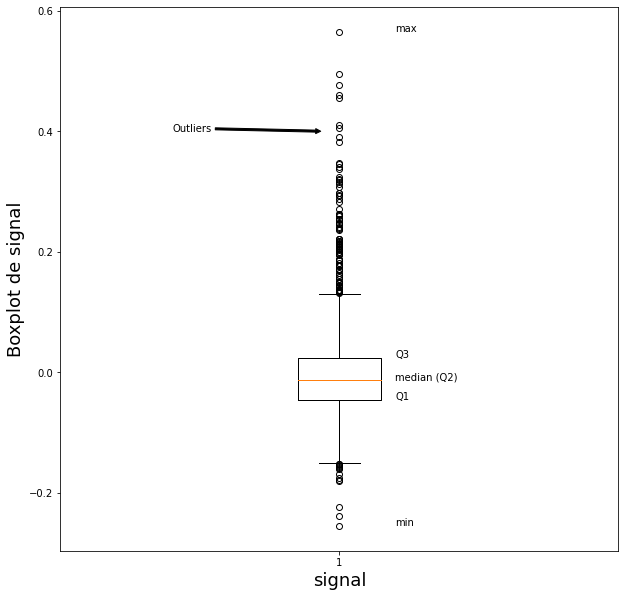

In [ ]:
X  = dataset['signal']

#clf limpia nuestra figua atual donde se graficará
plt.clf()
# Cambiar el tamaño de la gráfica
plt.figure(figsize=(10,10)) 
# Nombre del eje de las x
plt.xlabel('signal', fontsize=18)
# Nombre del eje de las y
plt.ylabel('Boxplot de signal', fontsize=18)


#Añadir textos en la gráfica
plt.text(x = 1.1, y = X.min(), s ='min')
plt.text(x = 1.1, y = X.quantile(0.25), s ='Q1')
plt.text(x = 1.1, y = X.median(), s ='median (Q2)')
plt.text(x = 1.1, y = X.quantile(0.75), s ='Q3')
plt.text(x = 1.1, y = X.max(), s ='max')

# Flechas
plt.annotate('Outliers', xy = (0.97,.4),xytext=(0.7, .4), arrowprops = dict(facecolor='black', arrowstyle = 'simple'))



#Histograma
plt.boxplot(dataset['signal'])
#plt show muestra el contenido de la figura actual
plt.show()

## NOTA
 A partir de aquí se utilizará Seaborn para realziar las gráficas. Si bien es posible realizarlas con Matplotlib, seaborn nos ofrece una manera mucho más sencilla de implementar gráficas complejas o avanzadas.

## Gráfica de conteo
Muestra el número de observaciones en cada categoría de una variable categórica.

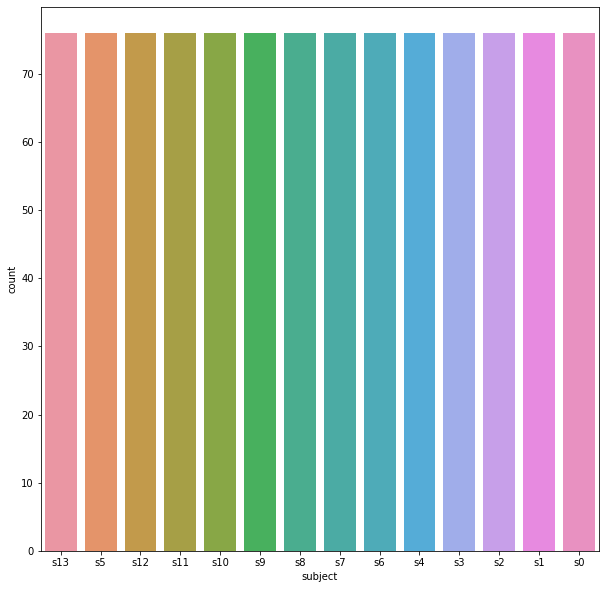

In [ ]:
plt.figure(figsize=(10,10)) 
sns.countplot(data=dataset, x = 'subject')
plt.show()

Podemos agregar otra varaible a través del parámetro hue

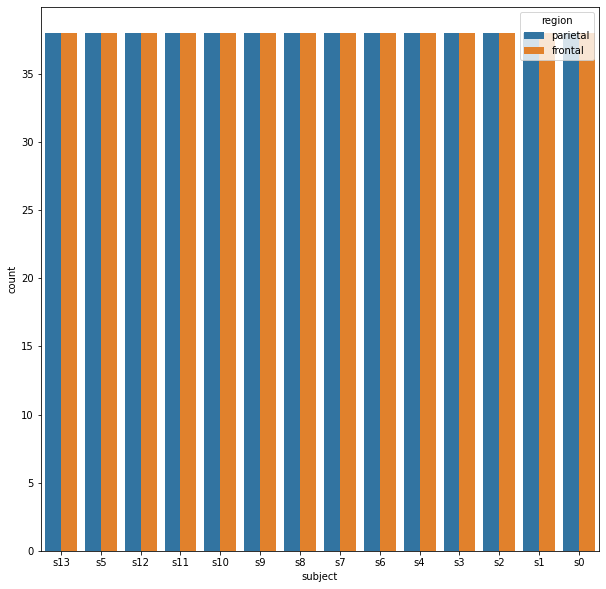

In [ ]:
plt.figure(figsize=(10,10)) 
sns.countplot(data=dataset, x = 'subject', hue='region')
plt.show()

## Gráfica de distribución

Se utiliza para visualizar la distribución de probabilidad de una variable continua.

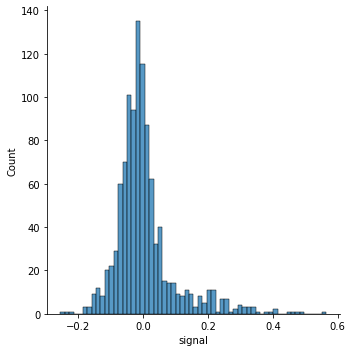

In [ ]:
sns.displot(dataset['signal'])
plt.show()

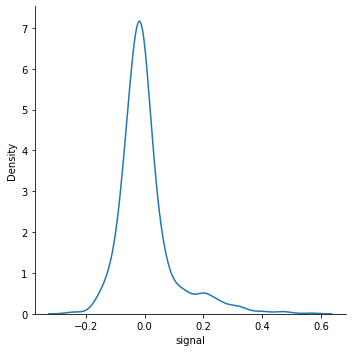

In [ ]:

# kernel density estimate, para la distribución de probabilidad
sns.displot(dataset['signal'], kind='kde')
plt.show()

## Gráfica de violín

Es muy similar al boxplot. Pero permite también visualizar la distribución de los datos y su densidad de probabilidad.



<Figure size 432x288 with 0 Axes>

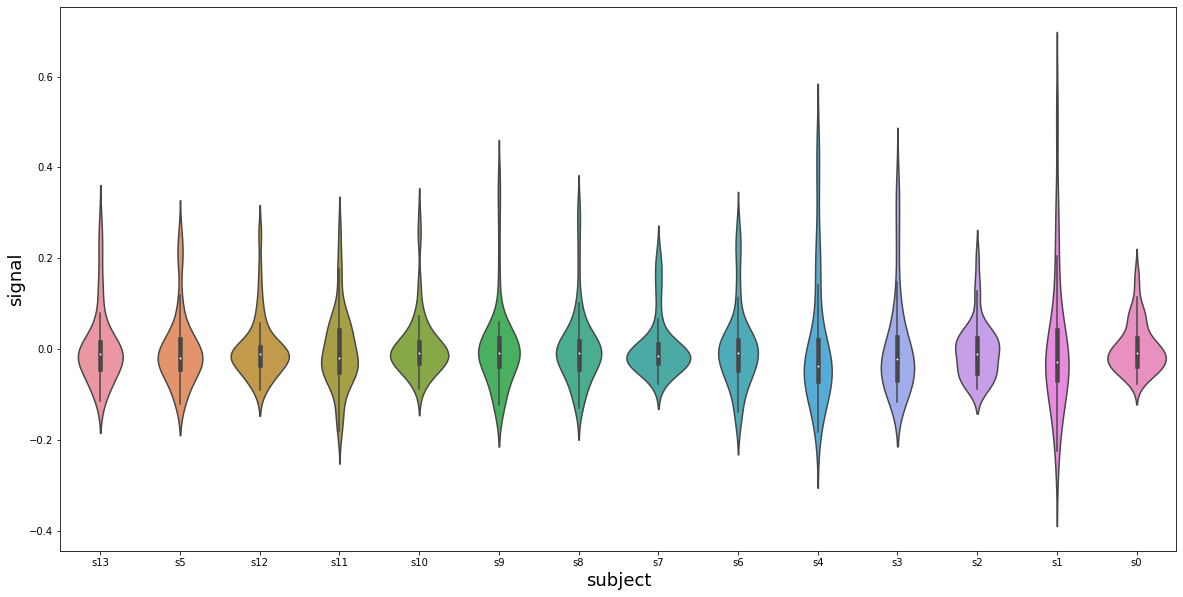

In [ ]:
#clf limpia nuestra figua atual donde se graficará
plt.clf()
# Cambiar el tamaño de la gráfica
plt.figure(figsize=(20,10)) 
# Nombre del eje de las x
plt.xlabel('signal', fontsize=18)
# Nombre del eje de las y
plt.ylabel('violin plot de signal', fontsize=18)

sns.violinplot(y = 'signal', x = 'subject', data = dataset)

plt.show()


## Pair plot

Crea una matríz de gráficas donde en cada cuadrícula se muestra la relación entre dos variable continuas. 
En los ejes diagonales se muestra la distribución univariada de cada variable continua.

<Figure size 432x288 with 0 Axes>

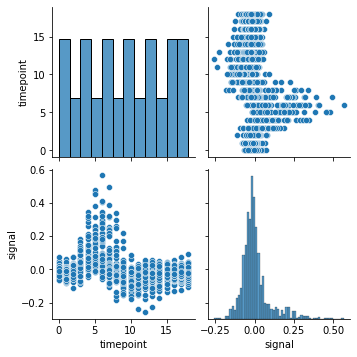

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    1064 non-null   object 
 1   timepoint  1064 non-null   int64  
 2   event      1064 non-null   object 
 3   region     1064 non-null   object 
 4   signal     1064 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


In [ ]:
plt.clf()
sns.pairplot(dataset)
plt.show()
dataset.info()

## Gráfica de calor (Heatmap)

El mapa de calor es una representación gráfica bidimensional de datos donde los valores individuales que están contenidos en una matriz se representan como colores.
 
Cada cuadrado en el mapa de calor muestra la correlación entre las variables en cada eje.

La correlación es una estadística que mide el grado en que dos variables se mueven entre sí.

In [ ]:
correlation = dataset.corr()
correlation

,timepoint,signal
timepoint,1.000000,-0.276935
signal,-0.276935,1.000000


[]

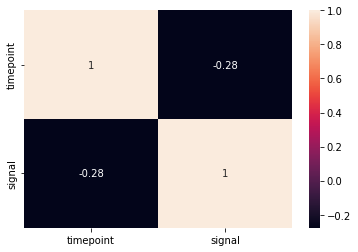

In [ ]:
sns.heatmap(correlation, annot = True)
plt.plot()

## ¿Qué gráfico debo de utilizar?

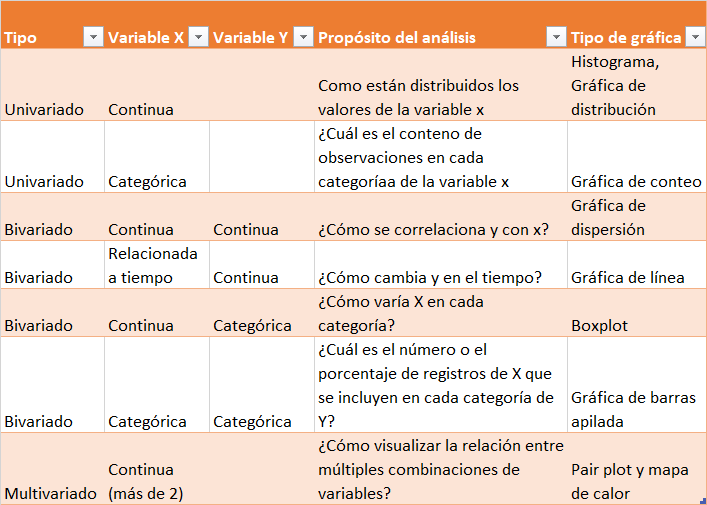

Más información:
https://www.data-to-viz.com/#explore

## Recomendaciones para visualización de datos

https://www.data-to-viz.com/caveats.html